In [2]:
import pandas as pd
import numpy as np
from pyforest import *
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

In [3]:
data = pd.read_csv('alzheimer.csv')

<IPython.core.display.Javascript object>

In [4]:
df_copy =data.copy()

In [5]:
data.shape

(373, 10)

In [6]:
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [7]:
data.groupby(['Group']).size()

Group
Converted       37
Demented       146
Nondemented    190
dtype: int64

In [8]:
data.select_dtypes('int64')

,Age,EDUC,eTIV
0,87,14,1987
1,88,14,2004
2,75,12,1678
3,76,12,1738
4,80,12,1698
...,...,...,...
368,82,16,1693
369,86,16,1688
370,61,13,1319
371,63,13,1327


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [10]:
data.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [11]:
group = data['Group'].unique()

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
le = LabelEncoder()
#for each in data['Group'].unique():
data['Group'] = le.fit_transform(data.Group)

In [14]:
data.Group.unique()

array([2, 1, 0])

In [15]:
list(zip(group, data.Group.unique()))

[('Nondemented', 2), ('Demented', 1), ('Converted', 0)]

In [16]:
data['M/F'] = le.fit_transform(data['M/F'])

In [17]:
list(zip(df_copy['M/F'].unique(), data['M/F'].unique()))

[('M', 1), ('F', 0)]

In [18]:
data.dtypes
print (data.isna().sum())

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


In [19]:
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(strategy='mean')
data['SES'] = data.SES.fillna(data['SES'].mean())
data['MMSE'] = data.MMSE.fillna(data['MMSE'].mean())

In [20]:
print (data.isna().sum())

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int32  
 1   M/F     373 non-null    int32  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 26.4 KB


In [22]:
data.corr()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.143918,-0.049267,0.100606,0.053290,0.339906,-0.572518,0.056693,0.258093,-0.042848
M/F,-0.143918,1.000000,-0.037726,0.089279,-0.044525,-0.166521,0.202140,0.572549,-0.249618,-0.561647
Age,-0.049267,-0.037726,1.000000,-0.027886,-0.046665,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.100606,0.089279,-0.027886,1.000000,-0.708680,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,0.053290,-0.044525,-0.046665,-0.708680,1.000000,-0.146913,0.073393,-0.254271,0.089436,0.246673
MMSE,0.339906,-0.166521,0.055607,0.194454,-0.146913,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,-0.572518,0.202140,-0.026257,-0.153121,0.073393,-0.679837,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.056693,0.572549,0.042348,0.257015,-0.254271,-0.031789,0.022819,1.000000,-0.210122,-0.988877
nWBV,0.258093,-0.249618,-0.518359,-0.012200,0.089436,0.341857,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.042848,-0.561647,-0.035067,-0.241752,0.246673,0.039494,-0.029340,-0.988877,0.213476,1.000000


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

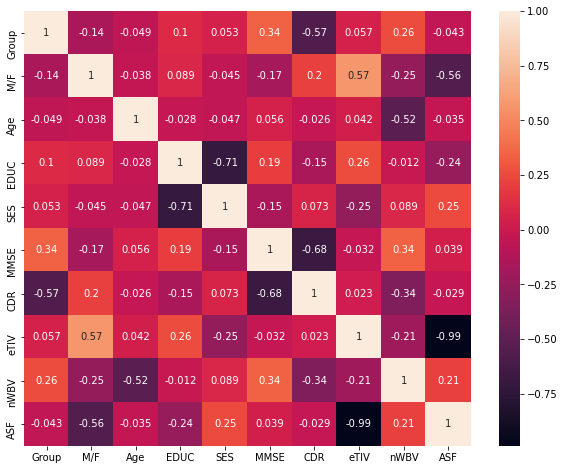

In [24]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

In [25]:
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [26]:
sns.pairplot(X)

NameError: name 'X' is not defined

In [ ]:
sns.scatterplot(data=X, x='MMSE', y='Age', hue=data.Group)

In [ ]:
plt.figure(figsize=(15,6))
sns.relplot(data=X, x='Age', y='nWBV', kind='scatter', hue=df_copy.Group)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [ ]:
y = data.Group
X = data.drop('Group', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# catboost = CatBoostClassifier()#depth=10, iterations=1000, learning_rate=0.05,verbose=False)#depth=5, iterations=200, learning_rate=0.05,verbose=False)
# catboost.fit(X_train, y_train);


In [ ]:
# cat_predict = catboost.predict(X_test)
# catboost.score(X_test, y_test)

In [ ]:
# cat_cv = cross_val_score(catboost, X, y, cv=10)


In [ ]:
#import xgboost as xgb
xgboost = XGBClassifier()#XGBClassifier()#learning_rate=0.01, max_depth=10,
                          #    n_estimators=100, subsample=0.8,use_label_encoder=False)

In [ ]:
xgboost.fit(X_train, y_train);

In [ ]:
xgboost.score(X_test, y_test)

In [ ]:
lightgbm = LGBMClassifier()#learning_rate=0.01, max_depth=5, min_child_samples=20, num_leaves=
                           #n_estimators=10000, subsample=0.5)

In [ ]:
lightgbm.fit(X_train, y_train)

In [ ]:
lightgbm.score(X_test, y_test)

In [ ]:
lr = LogisticRegression(random_state=42)#solver='liblinear')

In [ ]:
# for train_index, test_index in kf.split(X):
#     X_train,X_test = X.iloc[train_index, :], X.iloc[test_index,:]
#     y_train, y_test = y[train_index], y[test_index]
    
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
# gbmc = GradientBoostingClassifier(random_state=42)
# gbmc.fit(X_train,y_train)

In [ ]:
# gbmc.score(X_test, y_test)

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

In [ ]:
knc.score(X_test, y_test)

In [ ]:
kcv = cross_val_score(knc, X,y,cv=10)
kcv.mean()

In [ ]:
kcv

In [ ]:
gbc = GaussianNB()
gbc.fit(X_train, y_train)


In [ ]:
gbc.score(X_test, y_test)

In [ ]:
gbcv = cross_val_score(gbc, X, y, cv=10)
gbcv.mean()

In [ ]:
gbcv

In [ ]:
rf  = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
rfcv = cross_val_score(rf, X, y, cv=10)
rfcv.mean()

In [ ]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.viridis)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, plot_confusion_matrix

In [ ]:
models = [rf, gbc, knc, lightgbm, xgboost]
r = pd.DataFrame(columns=["MODELS","ACC","PRECISION", "RECALL", 'F1_SCORE'])

for model in models:
    name = model.__class__.__name__
    #predict = model.predict(X_test)
    accuracy = round(model.score(X_test, y_test),3)
    precision = round(precision_score(y_test, model.predict(X_test), average='macro', zero_division=0),3)
    recall = round(recall_score(y_test, model.predict(X_test), average='macro', zero_division=0),3)
    f1_scores = round(f1_score(y_test, model.predict(X_test), average='macro', zero_division=0),3)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"f1_score: {f1_scores}")
    result = pd.DataFrame([[name,accuracy*100, precision*100, recall*100, f1_scores*100]],columns=["MODELS","ACC","PRECISION","RECALL", "F1_SCORE"])
    r = r.append(result)

    

In [ ]:
r.T#.to_excel('outputs.xlsx')

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="ACC",y="MODELS",data=r)
plt.xlabel("ACCURACY")
plt.title("MODEL ACCURACY COMPARISON")
#plt.grid()